# Lab Overview

## Objective:
Students will build and experiment with an autoencoder using Python in a Jupyter Notebook. The autoencoder will learn to compress 5D data (from principal component analysis of MD simulation data) into a 2D latent space and then reconstruct the original data. The lab will guide students through visualization of the 2D latent space and computation of the reconstruction loss.

## Definitions

### Latent Space:
A **latent space** is an abstract, lower-dimensional representation of high-dimensional data. When an autoencoder compresses data, the encoder maps the original input into this latent space where the essential, underlying features of the data are captured in a compact form. This space is *latent* because its dimensions are not directly observable—they represent inferred factors that succinctly summarize the complex structure of the input data.

### Neural Network:
A **neural network** is a type of computer program that learns from examples. It takes in input data, passes it through several layers of simple processing units (called neurons) which perform a non-linear function of the data (called activation) and then produces an output like a decision or prediction. Some of these layers are called **hidden layers** because they aren't seen from the outside; they work behind the scenes to help the network learn complex patterns. Each hidden layer transforms the data a bit more until the final layer makes the decision.

### Unsupervised Learning:
**Unsupervised learning** is a type of machine learning where the computer tries to find patterns and structure in data without any explicit instructions on what to look for. Unlike supervised learning, where you teach the computer by providing correct answers, unsupervised learning lets the computer explore the data on its own. Clustering is another example of unsupervised learning. (Note: Decision trees are an example of supervised learning because they are trained with labeled data.)

### Introduction to Autoencoders:
An **autoencoder** is a type of neural network used for unsupervised learning. It consists of two main parts:

- **Encoder:** Compresses high-dimensional input data non-linearly into a lower-dimensional representation (the latent space).
- **Decoder:** Attempts to reconstruct the original data from this compact representation.

The network is trained by minimizing the difference (loss) between the original data and its reconstruction.


# ReLU Activation in Neural Networks

The **Rectified Linear Unit (ReLU)** is a commonly used activation function in neural networks. It is defined mathematically as:

$$
\text{ReLU}(x) = \max(0, x)
$$

This means that for any input value:
- If \( x \) is positive, **ReLU** outputs \( x \).
- If \( x \) is negative, **ReLU** outputs 0.

## Why Use ReLU?
- **Simplicity:** The function is computationally efficient.
- **Nonlinearity:** It introduces nonlinearity into the model, which helps the network learn complex patterns.



In [1]:
import numpy as np                # Import NumPy for numerical operations
import pandas as pd               # Import Pandas for data handling and analysis
import matplotlib.pyplot as plt   # Import Matplotlib for plotting
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for normalizing data

# Load the data from a text file.
# The file '../data/TM_projections.txt' is assumed to be space-separated.
# 'header=None' specifies that the file does not have a header row.
data = pd.read_csv('../data/TM_projections.txt', delim_whitespace=True, header=None)

# Assign column names to the data. Since the file lacks headers, we manually name them.
data.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

# Extract the features from the DataFrame as a NumPy array.
# Here, 'features' will contain the data from all 5 columns corresponding to the principal components.
features = data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].values

# Create an instance of StandardScaler, which standardizes features by removing the mean and scaling to unit variance.
# this is to put all the features on a common scale. 
scaler = StandardScaler()

# Fit the scaler to the data and transform it.
# 'features_norm' will contain the normalized version of the original features.
features_norm = scaler.fit_transform(features)


/tmp/ipykernel_747900/2402658405.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('../data/TM_projections.txt', delim_whitespace=True, header=None)


In [4]:
import tensorflow as tf                       # Import TensorFlow for building and training neural networks
from tensorflow.keras import layers, models, optimizers  # Import necessary modules from Keras

# Define the dimensions of the data and the latent space
input_dim = 5      # The input data has 5 features (e.g., five principal components)
latent_dim = 2     # We want to compress the data into a 2-dimensional latent space, so we can visualize it!

# Build the autoencoder model

# Define the input layer that expects vectors of length equal to input_dim (5 features)
input_layer = layers.Input(shape=(input_dim,))

# Build the encoder part of the network:
# 1. First Dense layer with a certain number of neurons (10 to start with)  and ReLU activation, which processes the input data.
# A dense layer is also called a fully-connected layer. It just means each neuron takes input from all of the neurons in the pervious layer
encoded = layers.Dense(100, activation='relu')(input_layer)
# 2. Second Dense layer that compresses the data to the latent space (2 dimensions) with ReLU activation.
latent = layers.Dense(latent_dim, activation='relu')(encoded)

# Build the decoder part of the network:
# 1. First Dense layer in the decoder, which expands the latent representation back to the previous number of neurons.
decoded = layers.Dense(100, activation='relu')(latent)
# 2. Final Dense layer reconstructs the data to its original dimensionality (5 features).
#    'linear' activation is used since we want to predict continuous values.
output_layer = layers.Dense(input_dim, activation='linear')(decoded)

# Create the autoencoder model:
# This model maps an input directly to its reconstruction.
autoencoder = models.Model(input_layer, output_layer)

# Create a separate encoder model for visualization:
# This model maps an input to its latent (compressed) representation.
encoder = models.Model(input_layer, latent)

# Compile the autoencoder model:
# We use the Adam optimizer and mean squared error (MSE) as the loss function.
# MSE measures the difference between the input data and its reconstruction.
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mse')



Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.4553 - val_loss: 2.2598
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1808 - val_loss: 2.2625
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1600 - val_loss: 2.0170
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1382 - val_loss: 1.4293
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1209 - val_loss: 0.9502
Epoch 6/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1110 - val_loss: 0.9637
Epoch 7/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1042 - val_loss: 0.8899
Epoch 8/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0998 - val_loss: 0.9262
Epoch 9/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0968 - val_loss: 0.9399
Epoch 10/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0935 - val_loss: 0.9522
Epoch 11/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0902 - val_loss: 0.9603
Epoch 12/100
1125/1

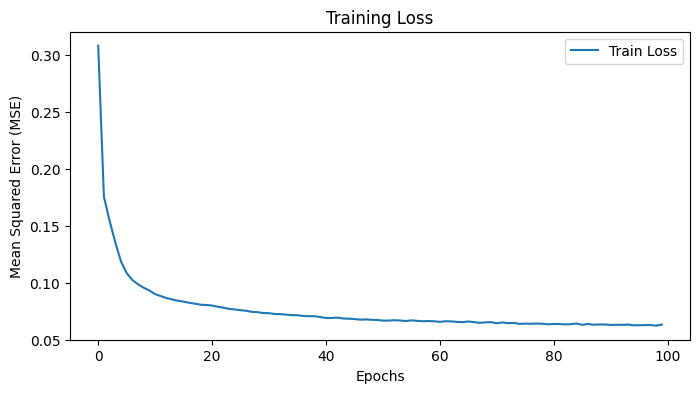

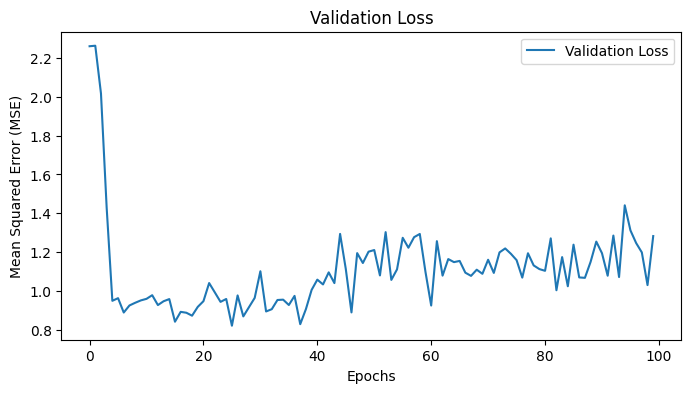

In [5]:
# Train the autoencoder model.
# The model is trained using the normalized features as both input and target, since the goal is reconstruction.
# 'epochs' is set to 100, meaning the entire dataset is passed through the model 100 times.
# 'batch_size' of 32 indicates that the model processes 32 samples at a time. 
# 'shuffle=True' randomizes the data order each epoch to improve training.
# 'validation_split=0.1' reserves 10% of the data for validation during training.
# this will take ~5-10 mins to run
history = autoencoder.fit(features_norm, features_norm,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.1)

# Plot the training loss over epochs.
plt.figure(figsize=(8, 4))  # Create a new figure with a specified size.
# Plot the training loss stored in the history object.
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel("Epochs")  # Label for the x-axis.
plt.ylabel("Mean Squared Error (MSE)")  # Label for the y-axis.
plt.title("Training Loss")  # Title for the plot.
plt.legend()  # Add a legend to the plot.
plt.show()  # Display the training loss plot.

# Plot the validation loss over epochs.
plt.figure(figsize=(8, 4))  # Create a new figure with a specified size.
# Plot the validation loss stored in the history object.
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")  # Label for the x-axis.
plt.ylabel("Mean Squared Error (MSE)")  # Label for the y-axis.
plt.title("Validation Loss")  # Title for the plot.
plt.legend()  # Add a legend to the plot.
plt.savefig('validation_loss_10.png', dpi=300, bbox_inches='tight')  # Save the figure as a PNG file. Change the title as appropriate.
plt.show()  # Display the validation loss plot.



**Model Training**
The autoencoder is trained by fitting the model to the normalized features. The same data is used as both input and target since the autoencoder's purpose is to reconstruct its input. The training process also splits off 10% of the data as a validation set to monitor the model's performance on unseen data.

**Plotting Loss (aka Error) Curves**
Two separate figures are created: one for the training loss and one for the validation loss. The loss (measured as Mean Squared Error) is plotted against the number of epochs. These plots help assess how well the model is learning over time and whether it is overfitting or underfitting.

**Plot Trends**
You should see that with 10 neurons, the training loss is going down, but the validation loss isn't really. This says that the model is not doing a good job of capturing the variation in the data. This could be due to over-fitting with too many neurons, too many epochs or could be due to not having enough neurons to capture the variation in the data

Keep going for now, then you will see about how to do a better job.

In [ ]:
# Now let's visualize the results
# Compute the latent representations using the encoder part of the autoencoder.
# The encoder compresses the normalized input data (features_norm) into a lower-dimensional latent space.
latent_reps = encoder.predict(features_norm)

# Create a figure to plot the 2D latent space representation.
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility.

# Create a scatter plot of the latent representations.
# Each point represents the compressed version of one data sample in 2D.
plt.scatter(latent_reps[:, 0], latent_reps[:, 1], alpha=0.6)  # 'alpha' sets the transparency of the points.

# Label the axes to indicate the two latent dimensions.
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Set the title of the plot.
plt.title('2D Latent Space Representation')

# Display the plot.
plt.show()
plt.savefig('latent_space_representation_10.png', dpi=300, bbox_inches='tight')

This visualation probably is not very useful, since there are so many overlapping counts. Let's do a contour plot instead.

In [ ]:
import corner  # Import the corner package for generating corner plots

# Combine the two latent dimensions into a single 2D array.
# This creates an array with shape (number_of_samples, 2) where each row contains [latent_dimension_1, latent_dimension_2]
latent_2d = np.column_stack([latent_reps[:, 0], latent_reps[:, 1]])

# Generate a corner plot to visualize the distribution and relationship between the two latent dimensions.
# The 'show_titles=True' argument adds a title to each subplot showing summary statistics (e.g., mean, quantiles).
fig = corner.corner(latent_2d, show_titles=True)



We can make a prettier contor plot manually.

In [ ]:
from scipy.stats import gaussian_kde  # Import the Gaussian KDE function for density estimation

# Extract x and y coordinates from the latent representations.
# 'x' corresponds to the first latent dimension, and 'y' to the second.
x = latent_reps[:, 0]
y = latent_reps[:, 1]

# Stack the x and y arrays vertically to create a 2-row array.
# This is required for the gaussian_kde function.
xy = np.vstack([x, y])

# Perform Gaussian Kernel Density Estimation (KDE) on the latent space coordinates.
# This estimates the probability density function over the latent space.
kde = gaussian_kde(xy)

# Create a grid over the latent space for evaluating the KDE.
# Extend the range slightly by subtracting/adding 0.1 to the minimum and maximum values.
xmin, xmax = x.min() - 0.1, x.max() + 0.1
ymin, ymax = y.min() - 0.1, y.max() + 0.1

# Create a meshgrid with 100 points in each dimension (using 100j for complex step size).
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Flatten the grid arrays and stack them to form a 2-row array of grid coordinates.
grid_coords = np.vstack([xx.ravel(), yy.ravel()])

# Evaluate the KDE on the grid and reshape the result to match the grid's shape.
zz = kde(grid_coords).reshape(xx.shape)

# Create a new figure for the contour plot with specified size.
plt.figure(figsize=(8, 6))

# Create a filled contour plot of the density (zz) over the grid (xx, yy).
# The colormap 'viridis' is used for visualization.
contour = plt.contourf(xx, yy, zz, cmap='viridis')

# Label the x-axis and y-axis.
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Set the title of the plot.
plt.title('Contour Plot of Latent Space Density')

# Add a colorbar to the plot, with a label indicating that it represents density.
plt.colorbar(contour, label='Density')

# Save the figure to a file with high resolution (300 DPI) and tight layout.
plt.savefig('latent_space_density_contour_10.png', dpi=300, bbox_inches='tight')

# Display the contour plot.
plt.show()


In [ ]:
# Reconstruct the data using the autoencoder.
# The autoencoder predicts an output that should be similar to the input (features_norm)
# because it is trained to reconstruct the input data.
reconstructed = autoencoder.predict(features_norm)

# Calculate the reconstruction loss using Mean Squared Error (MSE).
# We compute the element-wise squared difference between the normalized input and the reconstructed output,
# then take the mean of these squared differences.
# tf.reduce_mean computes the average loss over all data points.
# .numpy() converts the resulting TensorFlow tensor into a NumPy array (or scalar) for easier printing.
mse_loss = tf.reduce_mean(tf.square(features_norm - reconstructed)).numpy()

# Print the computed reconstruction loss formatted to four decimal places.
print(f"Reconstruction Loss (MSE): {mse_loss:.4f}")




**Exercise**
What happens to everything if you change to 20 neurons? How about 100 neurons? Which number of neurons seems best? If we were doing this for a real research project, we would look at more than just a few options.

Remember that we have from clustering that there are 6 clusters in this data. Can you identify them? Note, with the manual contour plot (the second one), we could identify the points in different contours, but we will not today.
